In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [16]:
data = pd.read_csv('Unemployment.csv')
print(data.head(5))

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

In [17]:
print(data.dtypes)

datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object


In [18]:
# Convert datestamp column to a datetime object
data['datestamp'] = pd.to_datetime(data['datestamp'])

In [19]:
# Set the datestamp columns as the index of your DataFrame
data = data.set_index('datestamp')

In [20]:
# Check the number of missing values in each columns
print(data.isnull().sum())

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64


In [11]:
data.columns

Index(['Agriculture', 'Business services', 'Construction',
       'Durable goods manufacturing', 'Education and Health', 'Finance',
       'Government', 'Information', 'Leisure and hospitality', 'Manufacturing',
       'Mining and Extraction', 'Nondurable goods manufacturing', 'Other',
       'Self-employed', 'Transportation and Utilities',
       'Wholesale and Retail Trade'],
      dtype='object')

In [12]:
data.describe()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,9.840984,6.919672,9.426230,6.025410,3.420492,3.540164,2.581148,5.486885,8.315574,5.982787,5.088525,5.930328,5.096721,3.031967,4.935246,5.766393
std,3.962067,1.862534,4.587619,2.854475,0.877538,1.235405,0.686750,2.016582,1.605570,2.484221,2.942428,1.922330,1.317457,1.124429,1.753340,1.463417
min,2.400000,4.100000,4.400000,2.800000,1.800000,2.100000,1.300000,2.400000,5.900000,3.100000,0.300000,3.100000,2.900000,1.700000,2.300000,3.600000
25%,6.900000,5.600000,6.100000,4.125000,2.900000,2.700000,2.100000,3.900000,7.300000,4.500000,3.200000,4.825000,4.200000,2.400000,3.900000,4.800000
50%,9.600000,6.450000,8.100000,5.100000,3.200000,3.300000,2.400000,5.150000,8.050000,5.300000,4.300000,5.500000,4.900000,2.700000,4.400000,5.400000
75%,11.950000,7.875000,10.975000,6.775000,3.700000,3.700000,2.875000,6.900000,8.800000,6.600000,6.050000,6.100000,5.600000,3.200000,5.400000,6.200000
max,21.300000,12.000000,27.100000,14.100000,6.100000,7.500000,5.100000,11.500000,14.200000,13.000000,16.100000,12.000000,10.000000,7.200000,11.300000,10.500000


            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


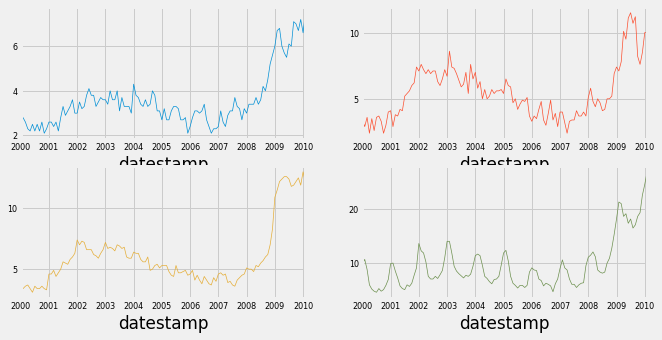

In [13]:
subset = data[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(subset.head(5))

# Create a facetted graph with 2 rows and 2 columns
ax = subset.plot(subplots=True,
                    layout=(2, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=8,
                     legend=False);

plotting the monthly and yearly comparison

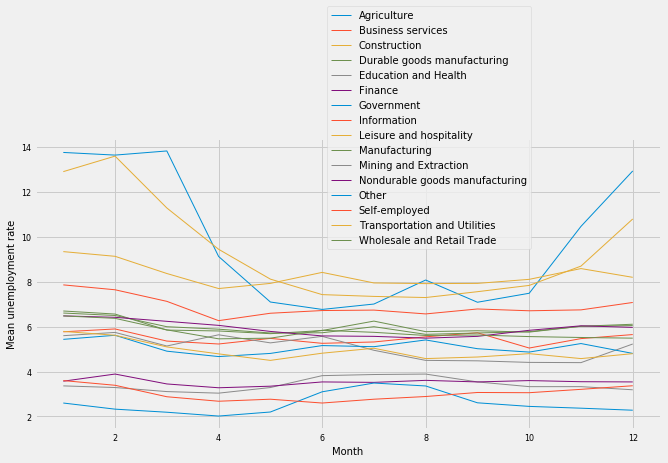

In [14]:
# Extract the month from the index of jobs
index_month = data.index.month

# Compute the mean unemployment rate for each month
xdata = data.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = xdata.plot(fontsize=8, linewidth=1);

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10);
ax.set_ylabel('Mean unemployment rate', fontsize=10);
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10);

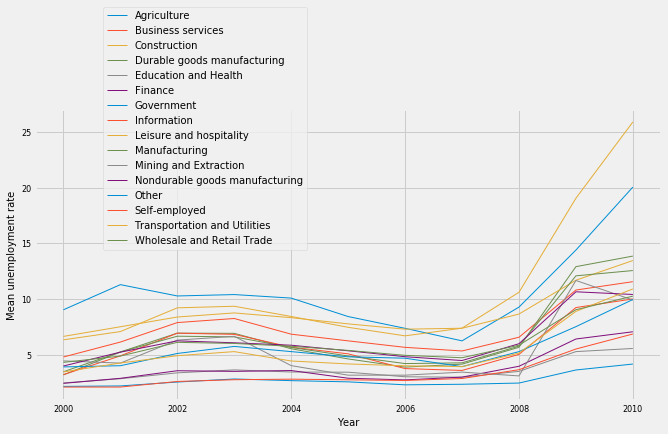

In [15]:
index_year = data.index.year

# Compute the mean unemployment rate for each year
data_by_year = data.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = data_by_year.plot(fontsize=8, linewidth=1);

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Mean unemployment rate', fontsize=10);
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10);

From this we can tell the trend of each job sector which demonstrate the fall and increase over time 
the meanrate at which employment was happening per year is also a factor which helps see the peak which for construction
we can tell the peak was at 25.

In [21]:
df = pd.read_csv('output.csv')
print(df.head(5))

   Year     Month        State         County  Rate
0  2015  February  Mississippi  Newton County   6.1
1  2015  February  Mississippi  Panola County   9.4
2  2015  February  Mississippi  Monroe County   7.9
3  2015  February  Mississippi   Hinds County   6.1
4  2015  February  Mississippi  Kemper County  10.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000285D4D7C288>,
      dtype=object)

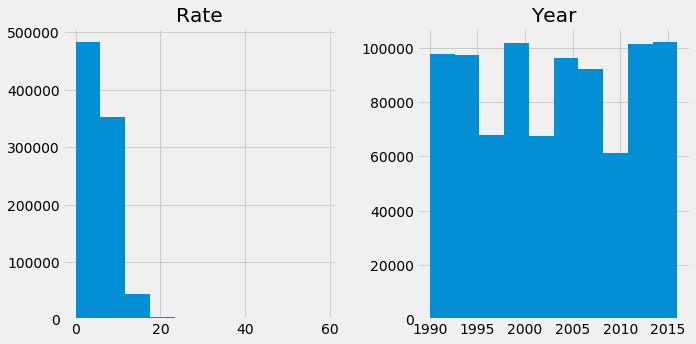

In [22]:
df.hist()

In [23]:
df.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

A.) Report Finding 
1.) with the correlation between the national dataset and the unemployment per job, we can see the low rate of employment 
2.) the visual increase in rate by year

B.) predict the employment rate in 2022. 
there will be a slight increase in the employment rate in 2020, because if we can see the trend and correlation of the jobg it can be determined that there will be a slight increase in the employment rate for 2020.